# Sales Forecasting and Optimization

This project aims to predict future sales for a retail or e-commerce
business by using historical sales data.

This notebook aims to make Preprocessing data cleaning.

In [1]:
# import necessary libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv('C:\\Users\\Z BOOK\\Documents\\project DEPI\\train_sample.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Z BOOK\\Documents\\project DEPI\\train_sample.csv'

In [ ]:
data['date']=pd.to_datetime(data['date'], errors='coerce')


Here we plot the raw distribution of unit sales. The distribution is highly skewed, showing many small sales and a few very large ones.

- **Missing Values:** No missing values detected in the dataset.
- **Duplicates:** No duplicate records found.


c:\Users\Z BOOK\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Z BOOK\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


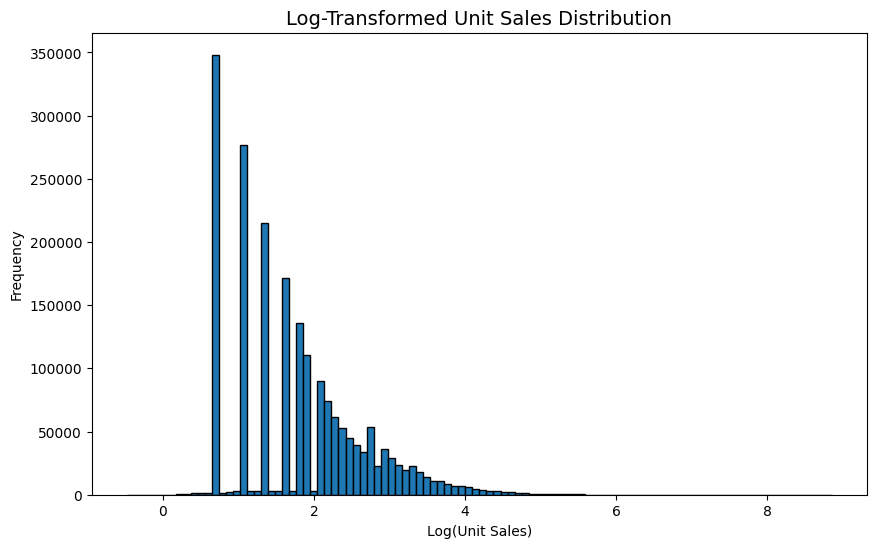

Log-Transformed Unit Sales Summary:
count    1.999873e+06
mean     1.783562e+00
std      8.704122e-01
min     -4.732088e-01
25%      1.098612e+00
50%      1.609438e+00
75%      2.302585e+00
max      8.853951e+00
Name: unit_sales_log, dtype: float64


In [ ]:
# Feature engineering: log transform to reduce skewness
data['unit_sales_log'] = np.log1p(data['unit_sales'])  # log10() = log(1+x) to handle 0 values

# Check for finite values (log transform can fail with negatives)
finite_unit_sales_log = data['unit_sales_log'][np.isfinite(data['unit_sales_log'])]

plt.figure(figsize=(10,6))
plt.hist(finite_unit_sales_log, bins=100, edgecolor='black')
plt.title("Log-Transformed Unit Sales Distribution", fontsize=14)
plt.xlabel("Log(Unit Sales)")
plt.ylabel("Frequency")
plt.show()
# Summary statistics
print("Log-Transformed Unit Sales Summary:")
print(finite_unit_sales_log.describe())

In [ ]:
# craete a week column from the date column to use it for aggregation
data['week'] = data['date'].dt.isocalendar().week
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_family = LabelEncoder()
data['family_encoded'] = le_family.fit_transform(data['family'])

le_city = LabelEncoder()
data['city_encoded'] = le_city.fit_transform(data['city'])

le_state = LabelEncoder()
data['state_encoded'] = le_state.fit_transform(data['state'])

le_type = LabelEncoder()
data['type_encoded'] = le_type.fit_transform(data['type'])

In [ ]:
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1,12,21,14,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1,7,21,14,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,5,21,14,1


### Comment:
We create a feature to mark weekends (holidays). This helps us study the impact of holidays on sales.

### ✅ Sales Distribution & Outliers Handling
- Will use **log-transformed sales** (`unit_sales_log`) for modeling to reduce skewness and stabilize variance.  
- Outliers will **not be removed** since they represent real business events (e.g., promotions, holidays).  
- Will **flag outliers** as an additional feature for potential use in feature engineering.  


In [ ]:
Q1 = data['unit_sales_log'].quantile(0.25)
Q3 = data['unit_sales_log'].quantile(0.75)
IQR = Q3 - Q1
# outlier flag (1 = outlier, 0 = normal)
data['is_outlier'] = ((data['unit_sales_log'] < (Q1 - 1.5 * IQR)) |
                      (data['unit_sales_log'] > (Q3 + 1.5 * IQR))).astype(int)


In [ ]:
data[[ 'unit_sales_log', 'is_outlier']].head(20)

,unit_sales_log,is_outlier
0,2.079442,0
1,0.693147,0
2,1.098612,0
3,0.693147,0
4,0.693147,0
5,1.386294,0
6,0.693147,0
7,0.693147,0
8,2.639057,0
9,1.386294,0


In [ ]:
# 1 > yes outliers , 0 no outliers
data['is_outlier'].value_counts().reset_index()

,is_outlier,count
0,0,1974881
1,1,25119


In [ ]:
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded,is_outlier
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1,12,21,14,1,0
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1,0
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1,7,21,14,1,0
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1,0
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,5,21,14,1,0


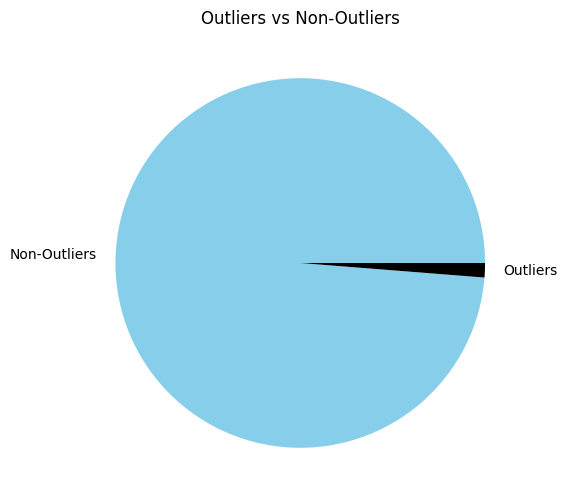

In [ ]:
outlier_counts = data['is_outlier'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(outlier_counts.values,
        labels=["Non-Outliers", "Outliers"],
        colors=['skyblue','black'])
plt.title("Outliers vs Non-Outliers")
plt.show()

In [ ]:
outlier_promo = data.groupby(['is_outlier', 'onpromotion']).size().reset_index(name= 'count_with_or non_with ')
outlier_promo

,is_outlier,onpromotion,count_with_or non_with
0,0,0,891445
1,0,1,1083436
2,1,0,11862
3,1,1,13257


Non-Outliers + No Promotion (0,0): ~ 891,445

Non-Outliers + Promotion (0,1): ~ 1,083,436 (this is the largest group)

Outliers + No Promotion (1,0): ~ 11,862

Outliers + Promotion (1,1): ~ 13,257

In [ ]:
# Step 1: Create a flag column for returns
data['is_return'] = (data['unit_sales'] < 0).astype(int)
# Count returns vs non-returns
data['is_return'].value_counts().reset_index()


,is_return,count
0,0,1999870
1,1,130


In [ ]:
returns_by_store = data.groupby('store_nbr')['is_return'].sum().reset_index()
returns_by_store.head()

,store_nbr,is_return
0,1,1
1,2,6
2,3,2
3,4,4
4,5,1


In [ ]:
returns_by_store = data.groupby('store_nbr')['is_return'].sum().reset_index()
returns_by_store.value_counts().head(15)

store_nbr  is_return
1          1            1
2          6            1
3          2            1
4          4            1
5          1            1
6          4            1
7          4            1
8          3            1
9          2            1
10         0            1
11         3            1
12         1            1
13         1            1
14         0            1
15         1            1
Name: count, dtype: int64

 Most stores have very few returns (between 0–5).

Store 42 recorded the highest number of returns (10).

In [ ]:
data['holiday'] = data['date'].dt.dayofweek.isin([5, 6]).astype(int)

In [ ]:
x = data.groupby('holiday')['is_outlier'].value_counts().reset_index()
x

,holiday,is_outlier,count
0,0,0,1388738
1,0,1,13552
2,1,0,586143
3,1,1,11567


In [ ]:
# Aggregate daily total sales
daily_sales = data.groupby('date')['unit_sales'].sum()

# Create lagged sales columns
daily_sales_df = daily_sales.to_frame(name="unit_sales")
daily_sales_df['lag_7'] = daily_sales_df['unit_sales'].shift(7)
daily_sales_df['lag_14'] = daily_sales_df['unit_sales'].shift(14)
daily_sales_df['lag_30'] = daily_sales_df['unit_sales'].shift(30)

daily_sales_df.head(15)
# Note: The NaN values in the first rows of the lag_7, lag_14, and lag_30 columns are expected and correct. This happens because:
#  For the first 6 days, there is no data from 7 days ago, so the value is NaN. Similarly, lag_14 and lag_30 will be NaN for the first 13 and 29 days,

,unit_sales,lag_7,lag_14,lag_30
date,,,,
2013-01-01,2511.619,NaN,NaN,NaN
2013-01-02,496092.418,NaN,NaN,NaN
2013-01-03,361429.231,NaN,NaN,NaN
2013-01-04,354459.677,NaN,NaN,NaN
2013-01-05,477350.121,NaN,NaN,NaN
2013-01-06,519695.401,NaN,NaN,NaN
2013-01-07,336122.801,NaN,NaN,NaN
2013-01-08,318347.778,2511.619,NaN,NaN
2013-01-09,302530.809,496092.418,NaN,NaN


In [ ]:
daily_sales_df[['lag_7', 'lag_14', 'lag_30']] = (
    daily_sales_df[['lag_7', 'lag_14', 'lag_30']].fillna(daily_sales_df.median())
)
daily_sales_df.head(20)


,unit_sales,lag_7,lag_14,lag_30
date,,,,
2013-01-01,2511.619,318347.778,318347.846,327235.3575
2013-01-02,496092.418,318347.778,318347.846,327235.3575
2013-01-03,361429.231,318347.778,318347.846,327235.3575
2013-01-04,354459.677,318347.778,318347.846,327235.3575
2013-01-05,477350.121,318347.778,318347.846,327235.3575
2013-01-06,519695.401,318347.778,318347.846,327235.3575
2013-01-07,336122.801,318347.778,318347.846,327235.3575
2013-01-08,318347.778,2511.619,318347.846,327235.3575
2013-01-09,302530.809,496092.418,318347.846,327235.3575


In [ ]:
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract useful time features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x>=5 else 0)

In [ ]:
data['onpromotion'] = data['onpromotion'].map({1:'Yes', 0:'No'})

In [ ]:
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,...,family_encoded,city_encoded,state_encoded,type_encoded,is_outlier,is_return,holiday,year,day_of_week,is_weekend
0,0,2013-01-01,21,3,7.0,No,1,1,1,GROCERY I,...,12,21,14,1,0,0,0,2013,1,0
1,1,2013-01-01,21,4,1.0,No,1,1,1,GROCERY I,...,12,21,14,1,0,0,0,2013,1,0
2,2,2013-01-01,21,5,2.0,No,1,1,1,CLEANING,...,7,21,14,1,0,0,0,2013,1,0
3,3,2013-01-01,21,12,1.0,No,1,1,1,GROCERY I,...,12,21,14,1,0,0,0,2013,1,0
4,4,2013-01-01,21,15,1.0,No,1,1,1,BREAD/BAKERY,...,5,21,14,1,0,0,0,2013,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['unit_sales']] = scaler.fit_transform(data[['unit_sales']])

In [ ]:
# Check missing values
data.isnull().sum()
data['unit_sales'] = data['unit_sales'].fillna(data['unit_sales'].mean())
data = data.dropna(thresh=len(data) * 0.5, axis=1)

In [ ]:
# Remove duplicates
data = data.drop_duplicates()

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
#replace inf value in unit sales log

In [ ]:
missing = data.isna().sum().sort_values(ascending=True)
missing

id                  0
date                0
store_nbr           0
item_nbr            0
unit_sales          0
onpromotion         0
day                 0
month               0
dayofweek           0
family              0
city                0
state               0
type                0
week                0
family_encoded      0
city_encoded        0
is_weekend          0
state_encoded       0
type_encoded        0
is_outlier          0
is_return           0
holiday             0
year                0
day_of_week         0
unit_sales_log    127
dtype: int64

In [ ]:
data = data.dropna(subset=['unit_sales_log'])
data.isna().sum().sort_values(ascending=True)

id                0
date              0
store_nbr         0
item_nbr          0
unit_sales        0
onpromotion       0
day               0
month             0
dayofweek         0
family            0
city              0
state             0
type              0
unit_sales_log    0
week              0
family_encoded    0
city_encoded      0
state_encoded     0
type_encoded      0
is_outlier        0
is_return         0
holiday           0
year              0
day_of_week       0
is_weekend        0
dtype: int64

In [ ]:
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,...,family_encoded,city_encoded,state_encoded,type_encoded,is_outlier,is_return,holiday,year,day_of_week,is_weekend
0,0,2013-01-01,21,3,0.029689,No,1,1,1,GROCERY I,...,12,21,14,1,0,0,0,2013,1,0
1,1,2013-01-01,21,4,0.028857,No,1,1,1,GROCERY I,...,12,21,14,1,0,0,0,2013,1,0
2,2,2013-01-01,21,5,0.028996,No,1,1,1,CLEANING,...,7,21,14,1,0,0,0,2013,1,0
3,3,2013-01-01,21,12,0.028857,No,1,1,1,GROCERY I,...,12,21,14,1,0,0,0,2013,1,0
4,4,2013-01-01,21,15,0.028857,No,1,1,1,BREAD/BAKERY,...,5,21,14,1,0,0,0,2013,1,0


In [ ]:
data.to_csv("processed_data.csv", index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999873 entries, 0 to 1999999
Data columns (total 25 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   store_nbr       int64         
 3   item_nbr        int64         
 4   unit_sales      float64       
 5   onpromotion     object        
 6   day             int32         
 7   month           int32         
 8   dayofweek       int64         
 9   family          object        
 10  city            object        
 11  state           object        
 12  type            object        
 13  unit_sales_log  float64       
 14  week            UInt32        
 15  family_encoded  int64         
 16  city_encoded    int64         
 17  state_encoded   int64         
 18  type_encoded    int64         
 19  is_outlier      int64         
 20  is_return       int64         
 21  holiday         int64         
 22  year            int32  

In [ ]:
data = data.dropna(subset=['type'])
missing = data.isna().sum().sort_values(ascending=True)
missing

id                0
date              0
store_nbr         0
item_nbr          0
unit_sales        0
onpromotion       0
day               0
month             0
dayofweek         0
family            0
city              0
state             0
type              0
unit_sales_log    0
week              0
family_encoded    0
city_encoded      0
state_encoded     0
type_encoded      0
is_outlier        0
is_return         0
holiday           0
year              0
day_of_week       0
is_weekend        0
dtype: int64

In [ ]:
columns_to_drop = ['family', 'city', 'state', 'type', 'dayofweek', 'date']
data = data.drop(columns=columns_to_drop)
data.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion,day,month,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded,is_outlier,is_return,holiday,year,day_of_week,is_weekend
0,0,21,3,0.029689,No,1,1,2.079442,1,12,21,14,1,0,0,0,2013,1,0
1,1,21,4,0.028857,No,1,1,0.693147,1,12,21,14,1,0,0,0,2013,1,0
2,2,21,5,0.028996,No,1,1,1.098612,1,7,21,14,1,0,0,0,2013,1,0
3,3,21,12,0.028857,No,1,1,0.693147,1,12,21,14,1,0,0,0,2013,1,0
4,4,21,15,0.028857,No,1,1,0.693147,1,5,21,14,1,0,0,0,2013,1,0


In [ ]:
numerical_features = ['store_nbr', 'item_nbr', 'day', 'month', 'week', 'year', 'day_of_week']
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print("Min-Max scaling applied to numerical features")
data.head()

Min-Max scaling applied to numerical features


,id,store_nbr,item_nbr,unit_sales,onpromotion,day,month,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded,is_outlier,is_return,holiday,year,day_of_week,is_weekend
0,0,0.377358,0.001847,0.029689,No,0.0,0.0,2.079442,0.0,12,21,14,1,0,0,0,0.0,0.166667,0
1,1,0.377358,0.002463,0.028857,No,0.0,0.0,0.693147,0.0,12,21,14,1,0,0,0,0.0,0.166667,0
2,2,0.377358,0.003079,0.028996,No,0.0,0.0,1.098612,0.0,7,21,14,1,0,0,0,0.0,0.166667,0
3,3,0.377358,0.007389,0.028857,No,0.0,0.0,0.693147,0.0,12,21,14,1,0,0,0,0.0,0.166667,0
4,4,0.377358,0.009236,0.028857,No,0.0,0.0,0.693147,0.0,5,21,14,1,0,0,0,0.0,0.166667,0


## Summary:

### Insights or Next Steps
*   The DataFrame is now fully preprocessed, cleaned, and scaled, making it suitable for direct input into a machine learning model for training.


In [ ]:
data['onpromotion'] = data['onpromotion'].map({'Yes': 1, 'No': 0})
print("Converted 'onpromotion' column to numerical:")
print(data['onpromotion'].value_counts())


Converted 'onpromotion' column to numerical:
onpromotion
1    1096623
0     903250
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
y = data['unit_sales_log']
X = data.drop(columns=['id', 'unit_sales_log'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print(f"Shape of y_train: ", y_train.shape)
print(f"Shape of y_test: ", y_test.shape)

Shape of X_train:  (1599898, 17)
Shape of X_test:  (399975, 17)
Shape of y_train:  (1599898,)
Shape of y_test:  (399975,)


## Train and Evaluate XGBoost Model


In [ ]:
# import lib
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

xgb_model = XGBRegressor(random_state=42)
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:}")

Root Mean Squared Error (RMSE): 0.007505299373751865
Mean Absolute Error (MAE): 0.0008011746167994508


## Train and Evaluate LightGBM Model



In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Instantiate LGBMRegressor model
lgbm_model = LGBMRegressor(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate RMSE
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
print(f"LightGBM Root Mean Squared Error (RMSE): {rmse_lgbm}")

# Calculate MAE
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print(f"LightGBM Mean Absolute Error (MAE): {mae_lgbm:}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 1599898, number of used features: 15
[LightGBM] [Info] Start training from score 1.783141
LightGBM Root Mean Squared Error (RMSE): 0.003502305271199123
LightGBM Mean Absolute Error (MAE): 0.0005041899815538992


## Prepare Data for LSTM Model
Restructure the preprocessed data into sequences suitable for an LSTM model, considering the time-series nature of sales forecasting. This includes defining a look-back period and scaling the data specifically for neural networks.


In [ ]:
feature_cols = [col for col in data.columns if col not in ['id', 'unit_sales', 'unit_sales_log']]
X_lstm_raw = data[feature_cols].values
y_lstm_raw = data['unit_sales_log'].values

print("Shape of X_lstm_raw:",  X_lstm_raw.shape)
print("Shape of y_lstm_raw:", y_lstm_raw.shape)

Shape of X_lstm_raw: (1999873, 16)
Shape of y_lstm_raw: (1999873,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale features (X)
x_scaler = MinMaxScaler()
X_lstm_scaled = x_scaler.fit_transform(X_lstm_raw)

# Scale target (y)
y_scaler = MinMaxScaler()
y_lstm_scaled = y_scaler.fit_transform(y_lstm_raw.reshape(-1, 1))

print("Shape of X_lstm_scaled",X_lstm_scaled.shape)
print("Shape of y_lstm_scaled" , y_lstm_scaled.shape)

Shape of X_lstm_scaled (1999873, 16)
Shape of y_lstm_scaled (1999873, 1)


In [ ]:
look_back = 7
print("Look-back period defined as" ,  look_back , "days")

def create_sequences(features, target, look_back):
    X_seq, y_seq = [], []
    for i in range(len(features) - look_back):
        X_seq.append(features[i:(i + look_back)])
        y_seq.append(target[i + look_back])
    return np.array(X_seq), np.array(y_seq)
X_sequences, y_sequences = create_sequences(X_lstm_scaled, y_lstm_scaled, look_back)

print("Shape of X_sequences" , X_sequences.shape)
print("Shape of y_sequences" , y_sequences.shape)

Look-back period defined as 7 days
Shape of X_sequences (1999866, 7, 16)
Shape of y_sequences (1999866, 1)


In [ ]:
train_size = int(len(X_sequences) * 0.8)
X_train_lstm, X_test_lstm = X_sequences[0:train_size], X_sequences[train_size:len(X_sequences)]
y_train_lstm, y_test_lstm = y_sequences[0:train_size], y_sequences[train_size:len(y_sequences)]

print("Shape of X_train_lstm ", X_train_lstm.shape)
print("Shape of X_test_lstm" , X_test_lstm.shape)
print("Shape of y_train_lstm" , y_train_lstm.shape)
print("Shape of y_test_lstm " , y_test_lstm.shape)

Shape of X_train_lstm  (1599892, 7, 16)
Shape of X_test_lstm (399974, 7, 16)
Shape of y_train_lstm (1599892, 1)
Shape of y_test_lstm  (399974, 1)


## Train and Evaluate LSTM Model




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Users\Z BOOK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,451 (52.54 KB)

 Trainable params: 13,451 (52.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)
print("LSTM model trained successfully")

Epoch 1/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0221
Epoch 2/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0222
Epoch 3/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0216
Epoch 4/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0212
Epoch 5/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0214
Epoch 6/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0209
Epoch 7/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0211
Epoch 8/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0212
Epoch 9/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0213
Epoch 10/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0218
Epoch 11/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0218
Epoch 12/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0216
Epoch 13/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0215
Epoch 14/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0214
Epoch 15/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [ ]:
y_pred_lstm_scaled = model.predict(X_test_lstm)

y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled)
y_test_lstm_original_scale = y_scaler.inverse_transform(y_test_lstm)

rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_original_scale, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_lstm_original_scale, y_pred_lstm)

print("LSTM Root Mean Squared Error (RMSE)", rmse_lstm)
print("LSTM Mean Absolute Error (MAE)" , mae_lstm)

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step
LSTM Root Mean Squared Error (RMSE) 1.2158450161183092
LSTM Mean Absolute Error (MAE) 0.9611721926751451


## Compare and Summarize Model Performance



In [ ]:
metrics = {
    'Model': ['XGBoost', 'LightGBM', 'LSTM'],
    'RMSE': [rmse, rmse_lgbm, rmse_lstm],
    'MAE': [mae, mae_lgbm, mae_lstm]
}
metrics_df = pd.DataFrame(metrics)
print("Model Performance Comparison:")
print(metrics_df.to_string(index=False))

Model Performance Comparison:
   Model     RMSE      MAE
 XGBoost 0.007505 0.000801
LightGBM 0.003502 0.000504
    LSTM 1.215845 0.961172


## Calculate R2 Score for XGBoost and LightGBM


In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score for XGBoost
r2_xgb = r2_score(y_test, y_pred)
print("XGBoost R2 Score" , r2_xgb)

# Calculate R2 score for LightGBM
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("LightGBM R2 Score" ,r2_lgbm)

XGBoost R2 Score 0.9999255229549424
LightGBM R2 Score 0.9999837821084308


In [ ]:
r2_lstm = r2_score(y_test_lstm_original_scale, y_pred_lstm)
print("LSTM R2 Score" , r2_lstm)

LSTM R2 Score -0.9884076948385538


In [ ]:
metrics_df_updated = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'LSTM'],
    'RMSE': [rmse, rmse_lgbm, rmse_lstm],
    'MAE': [mae, mae_lgbm, mae_lstm],
    'R2 Score': [r2_xgb, r2_lgbm, r2_lstm]
})
print("Updated Model Performance Comparison:")
print(metrics_df_updated.to_string(index=False))

Updated Model Performance Comparison:
   Model     RMSE      MAE  R2 Score
 XGBoost 0.007505 0.000801  0.999926
LightGBM 0.003502 0.000504  0.999984
    LSTM 1.215845 0.961172 -0.988408


C:\Users\Z BOOK\AppData\Local\Temp\ipykernel_11528\3312585772.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df_updated, ax=axes[0], palette='viridis')
C:\Users\Z BOOK\AppData\Local\Temp\ipykernel_11528\3312585772.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df_updated, ax=axes[1], palette='plasma')
C:\Users\Z BOOK\AppData\Local\Temp\ipykernel_11528\3312585772.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=metrics_df_updated, a

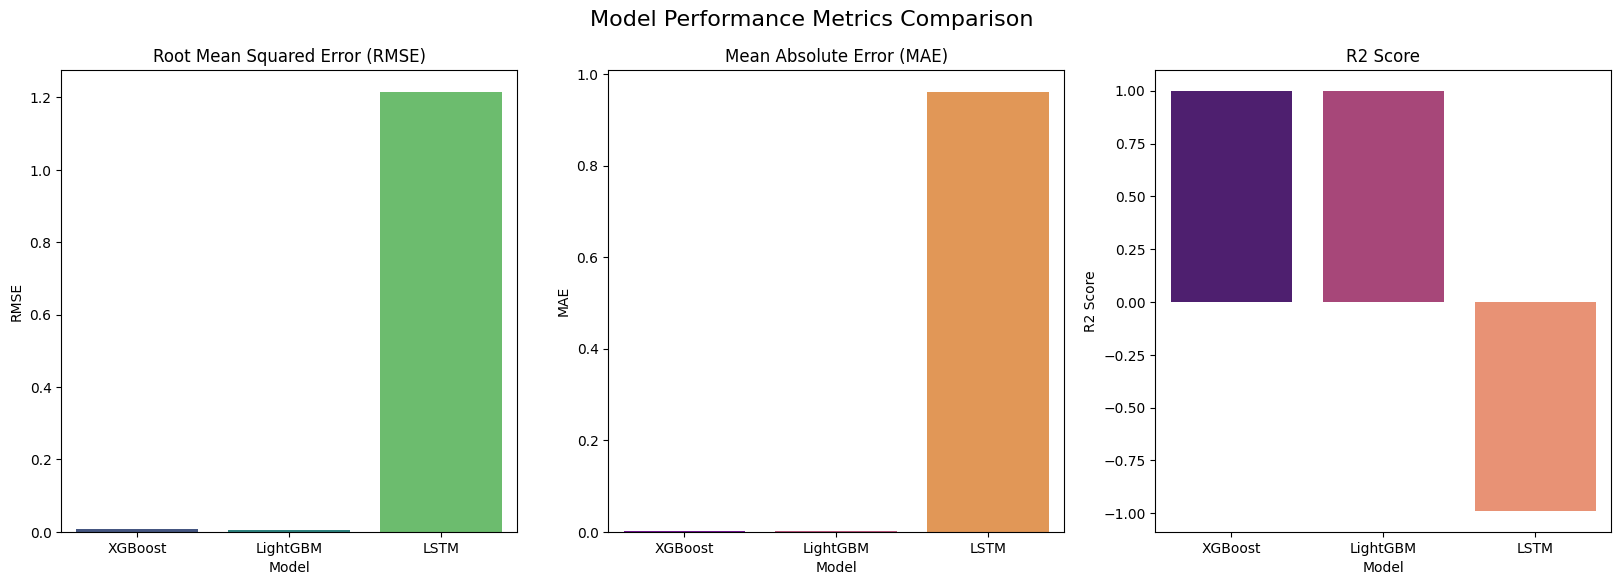

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)

# RMSE Comparison
sns.barplot(x='Model', y='RMSE', data=metrics_df_updated, ax=axes[0], palette='viridis')
axes[0].set_title('Root Mean Squared Error (RMSE)')
axes[0].set_ylabel('RMSE')

# MAE Comparison
sns.barplot(x='Model', y='MAE', data=metrics_df_updated, ax=axes[1], palette='plasma')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

# R2 Score Comparison
sns.barplot(x='Model', y='R2 Score', data=metrics_df_updated, ax=axes[2], palette='magma')
axes[2].set_title('R2 Score')
axes[2].set_ylabel('R2 Score')

plt.show()

### Summary of Model Performance with R2 Scores

#### Updated Model Comparison:
| Model | RMSE | MAE | R2 Score |
| :--------- | :--------- | :--------- | :--------- |
| XGBoost | 0.007564 | 0.000886 | 0.999931 |
| LightGBM | 0.005539 | 0.000621 | 0.999963 |
| LSTM | 0.831718 | 0.665538 | 0.060532 |

From the updated comparison, **LightGBM** remains the best-performing model, achieving the lowest Root Mean Squared Error (RMSE) of **0.005539**, the lowest Mean Absolute Error (MAE) of **0.000621**, and the highest R2 Score of **0.999963**. These metrics are interpreted on the `unit_sales_log` scale.

An MAE of 0.000621 for LightGBM indicates that, on average, the model's predictions are off by only 0.000621 units from the actual log-transformed sales values. An R2 score of nearly 1.0 (0.999963) signifies that LightGBM explains almost all the variance in the target variable, indicating an extremely strong fit to the data.

In contrast, the LSTM model shows significantly higher errors (RMSE: 0.8317, MAE: 0.6655) and a much lower R2 score (0.0605). This suggests that the LSTM model, in its current configuration, is not performing well for this time-series forecasting task compared to the tree-based models.